In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df_health_exp_capita = pd.read_csv('health_expenditure_percapita.csv', skiprows=4)
df_health_exp_gdp = pd.read_csv('health_expenditure_pergpd.csv', skiprows=4)
df_hiv_prev = pd.read_csv('HIV_prevalence.csv', skiprows=4)
df_hospital_beds = pd.read_csv('hospital_beds_per1000.csv', skiprows=4)
df_physicians = pd.read_csv('physicians_per1000.csv', skiprows = 4)
df_population = pd.read_csv('total_population.csv', skiprows = 4)

In [23]:
 df_health_exp_capita_Rwanda = df_health_exp_capita[df_health_exp_capita['Country Name'] == 'Rwanda']

In [26]:
df_health_exp_gdp_Rwanda = df_health_exp_gdp[df_health_exp_gdp['Country Name'] == 'Rwanda']
df_hiv_prev_Rwanda = df_hiv_prev[df_hiv_prev['Country Name'] == 'Rwanda']
df_hospital_beds_Rwanda = df_hospital_beds[df_hospital_beds['Country Name'] == 'Rwanda']
df_physicians_Rwanda = df_physicians[df_physicians['Country Name'] == 'Rwanda']
df_population_Rwanda = df_population[df_population['Country Name'] == 'Rwanda']

In [32]:
melted_df_population = pd.melt(df_population_Rwanda, 
                    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                    var_name='Year', 
                    value_name='Population')

In [34]:
def melt_dataframe(df, id_vars, var_name='Year', value_name='Value'):
    """
    Melts a given DataFrame from wide to long format.

    Parameters:
    - df: pd.DataFrame - The DataFrame to be melted.
    - id_vars: list - A list of columns to use as identifier variables.
    - var_name: str - The name to use for the 'variable' column. Default is 'Year'.
    - value_name: str - The name to use for the 'value' column. Default is 'Value'.

    Returns:
    - pd.DataFrame - The melted DataFrame.
    """
    melted_df = pd.melt(df, 
                        id_vars=id_vars, 
                        var_name=var_name, 
                        value_name=value_name)
    return melted_df

In [35]:
melted_df_population = melt_dataframe(df_population_Rwanda, 
                                      ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                      var_name='Year', 
                                      value_name='Population')

In [36]:
melted_df_health_exp_gdp = melt_dataframe(df_health_exp_gdp_Rwanda, 
                                 ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                      var_name='Year', 
                                      value_name='Health_exp_per_gdp')

melted_df_health_exp_capita_Rwanda = melt_dataframe(df_health_exp_capita_Rwanda, 
                                      ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                      var_name='Year', 
                                      value_name='Health_exp_per_capita')

melted_df_hiv_prev_Rwanda = melt_dataframe(df_hiv_prev_Rwanda, 
                                      ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                      var_name='Year', 
                                      value_name='HIV_prev')

df_hospital_beds_Rwanda = melt_dataframe(df_hospital_beds_Rwanda, 
                                      ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                      var_name='Year', 
                                      value_name='Hospital_beds')

df_physicians_Rwanda = melt_dataframe(df_physicians_Rwanda, 
                                      ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                      var_name='Year', 
                                      value_name='physians')

In [44]:
def drop_columns(df, columns_to_drop):
    """
    Drops specified columns from a DataFrame.

    Parameters:
    - df: pd.DataFrame - The DataFrame from which to drop columns.
    - columns_to_drop: list - A list of strings representing the column names to drop.

    Returns:
    - pd.DataFrame - The DataFrame with the specified columns dropped.
    """
    return df.drop(columns=columns_to_drop, errors='ignore')

# Example usage:
melted_df_population = drop_columns(melted_df_population, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])


In [46]:
melted_df_health_exp_gdp = drop_columns(melted_df_health_exp_gdp, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
melted_df_health_exp_capita_Rwanda = drop_columns(melted_df_health_exp_capita_Rwanda, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
melted_df_hiv_prev_Rwanda = drop_columns(melted_df_hiv_prev_Rwanda, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
df_hospital_beds_Rwanda = drop_columns(df_hospital_beds_Rwanda, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
df_physicians_Rwanda = drop_columns(df_physicians_Rwanda, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])

In [51]:
melted_df_health_exp_gdp

,Year,Health_exp_per_gdp
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN
...,...,...
59,2019,6.330251
60,2020,7.315621
61,2021,NaN
62,2022,NaN


In [65]:
# Merging the dataframes on 'Country Name' and 'Year'
merged_df = pd.merge(melted_df_population, melted_df_health_exp_gdp, on='Year')
merged_df = pd.merge(merged_df, melted_df_health_exp_capita_Rwanda, 
                     on='Year')
merged_df = pd.merge(merged_df, melted_df_hiv_prev_Rwanda, 
                     on='Year')
merged_df = pd.merge(merged_df, df_hospital_beds_Rwanda, 
                     on= 'Year')
merged_df = pd.merge(merged_df, df_physicians_Rwanda, 
                     on= 'Year')

In [69]:
# Convert the 'Year' column to integers, if necessary
merged_df['Year'] = pd.to_numeric(merged_df['Year'], errors='coerce')

# Then perform the selection
df_final = merged_df[(merged_df['Year'] >= 2007) & (merged_df['Year'] <= 2017)]

In [72]:
df_final = drop_columns(df_final, ['Hospital_beds'])

In [73]:
df_final

,Year,Population,Health_exp_per_gdp,Health_exp_per_capita,HIV_prev,physians
47,2007.0,9523168.0,7.862126,33.584347,3.5,NaN
48,2008.0,9781996.0,7.567043,40.047134,3.4,0.0520
49,2009.0,10043737.0,7.806949,44.084194,3.4,0.0550
50,2010.0,10309031.0,8.089235,48.025303,3.3,0.0550
51,2011.0,10576932.0,7.938798,51.650818,3.3,0.0129
52,2012.0,10840334.0,8.106678,57.216465,3.2,NaN
53,2013.0,11101350.0,6.776492,47.709457,3.1,0.0990
54,2014.0,11368451.0,6.989686,50.623516,3.1,0.0890
55,2015.0,11642959.0,6.654464,48.805096,3.0,0.1100
56,2016.0,11930899.0,6.960608,50.704155,2.9,0.1200


In [74]:
mean_value = df_final['physians'].mean()  # Calculate the mean value of the 'physicians' column, ignoring NaN
df_final['physians'] = df_final['physians'].fillna(mean_value)  # Fill NaN values with the mean

In [75]:
df_final

,Year,Population,Health_exp_per_gdp,Health_exp_per_capita,HIV_prev,physians
47,2007.0,9523168.0,7.862126,33.584347,3.5,0.080878
48,2008.0,9781996.0,7.567043,40.047134,3.4,0.052000
49,2009.0,10043737.0,7.806949,44.084194,3.4,0.055000
50,2010.0,10309031.0,8.089235,48.025303,3.3,0.055000
51,2011.0,10576932.0,7.938798,51.650818,3.3,0.012900
52,2012.0,10840334.0,8.106678,57.216465,3.2,0.080878
53,2013.0,11101350.0,6.776492,47.709457,3.1,0.099000
54,2014.0,11368451.0,6.989686,50.623516,3.1,0.089000
55,2015.0,11642959.0,6.654464,48.805096,3.0,0.110000
56,2016.0,11930899.0,6.960608,50.704155,2.9,0.120000


# EDA

In [76]:
df_final.describe()

,Year,Population,Health_exp_per_gdp,Health_exp_per_capita,HIV_prev,physians
count,11.000000,1.100000e+01,11.000000,11.000000,11.000000,11.000000
mean,2012.000000,1.084993e+07,7.376552,47.344763,3.181818,0.080878
std,3.316625,8.917911e+05,0.631813,6.284800,0.222792,0.035350
min,2007.000000,9.523168e+06,6.389997,33.584347,2.800000,0.012900
25%,2009.500000,1.017638e+07,6.868550,45.896826,3.050000,0.055000
50%,2012.000000,1.084033e+07,7.567043,48.341904,3.200000,0.080878
75%,2014.500000,1.150570e+07,7.900462,50.663836,3.350000,0.104500
max,2017.000000,1.223034e+07,8.106678,57.216465,3.500000,0.135000


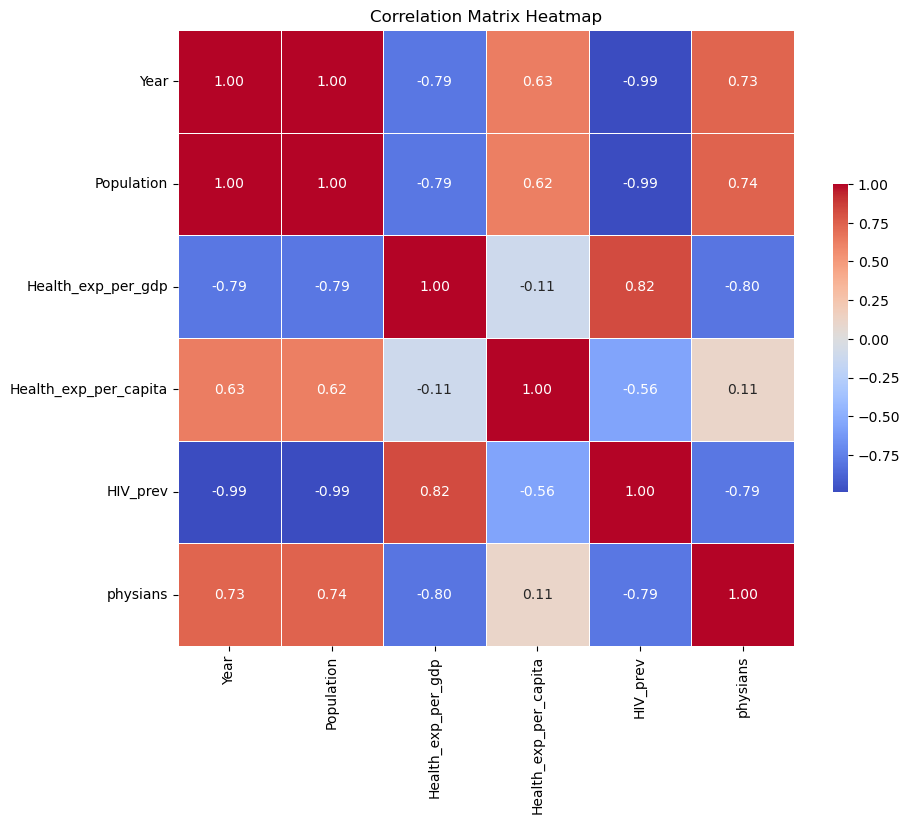

In [78]:
#checking the correlation
corr_matrix = df_final.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

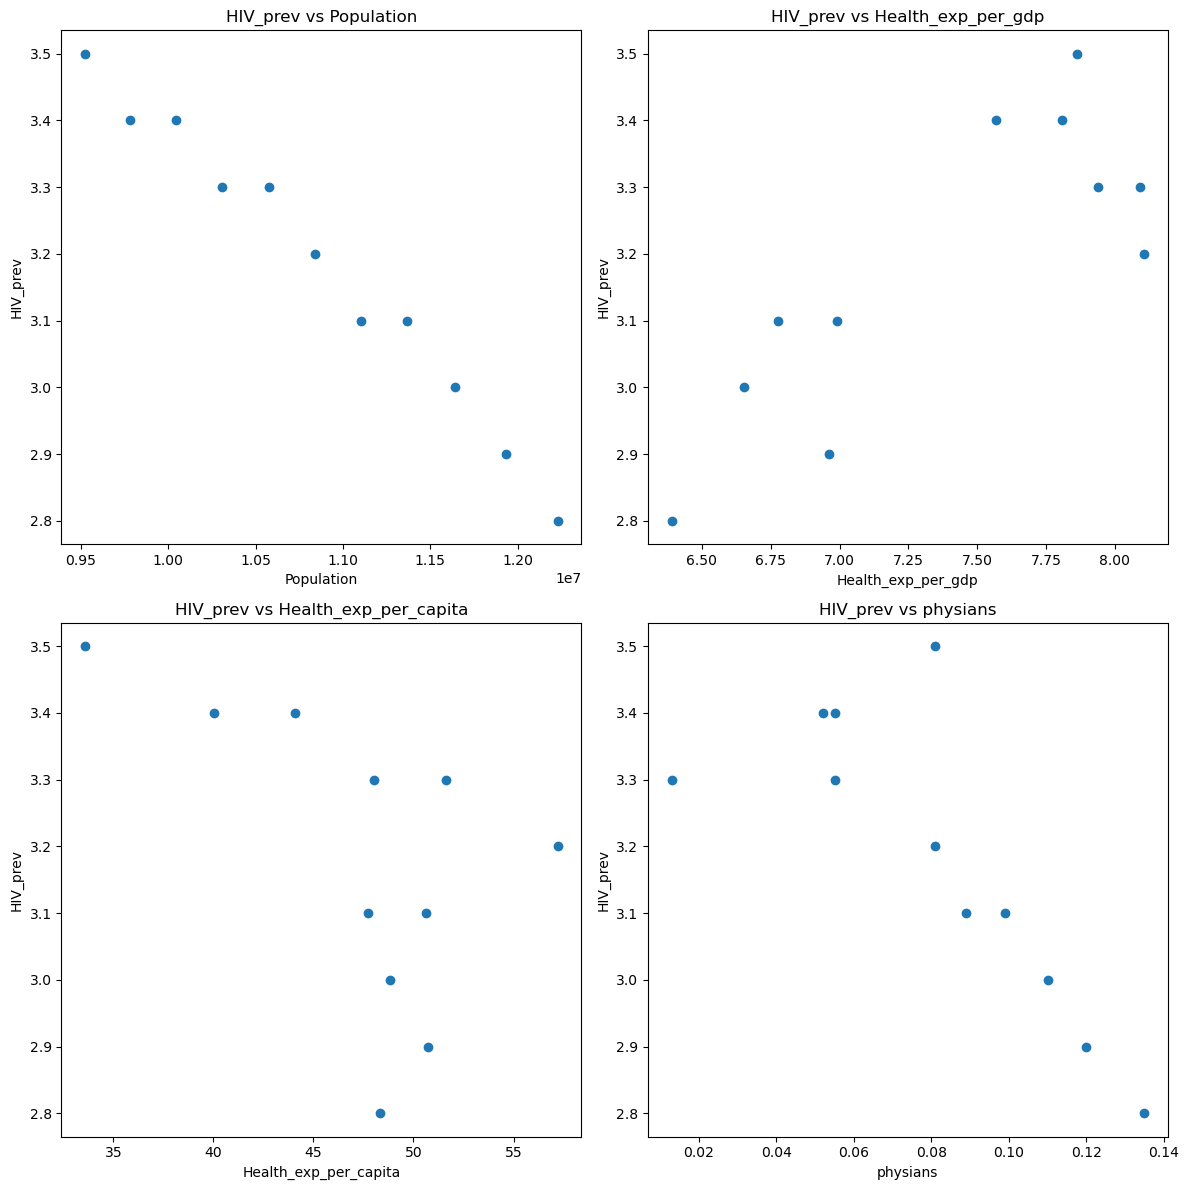

In [79]:
def plot_scatter(df, x_vars, y_var='HIV_prev'):
    """
    Generates scatter plots for the given y variable against multiple x variables.
    
    Parameters:
    - df: DataFrame containing the data.
    - x_vars: List of column names to be plotted on the x-axis.
    - y_var: Column name to be plotted on the y-axis.
    """
    # Number of rows/cols for the subplot grid
    n_cols = 2
    n_rows = (len(x_vars) + 1) // n_cols
    
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols*6, n_rows*6))
    axes = axes.flatten()  # Flatten to 1D array for easy indexing
    
    for i, x_var in enumerate(x_vars):
        # Create scatter plot for each x_var
        axes[i].scatter(df[x_var], df[y_var])
        axes[i].set_xlabel(x_var)
        axes[i].set_ylabel(y_var)
        axes[i].set_title(f'{y_var} vs {x_var}')
    
    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Usage
x_variables = ['Population', 'Health_exp_per_gdp', 'Health_exp_per_capita', 'physians']
plot_scatter(df_final, x_variables)


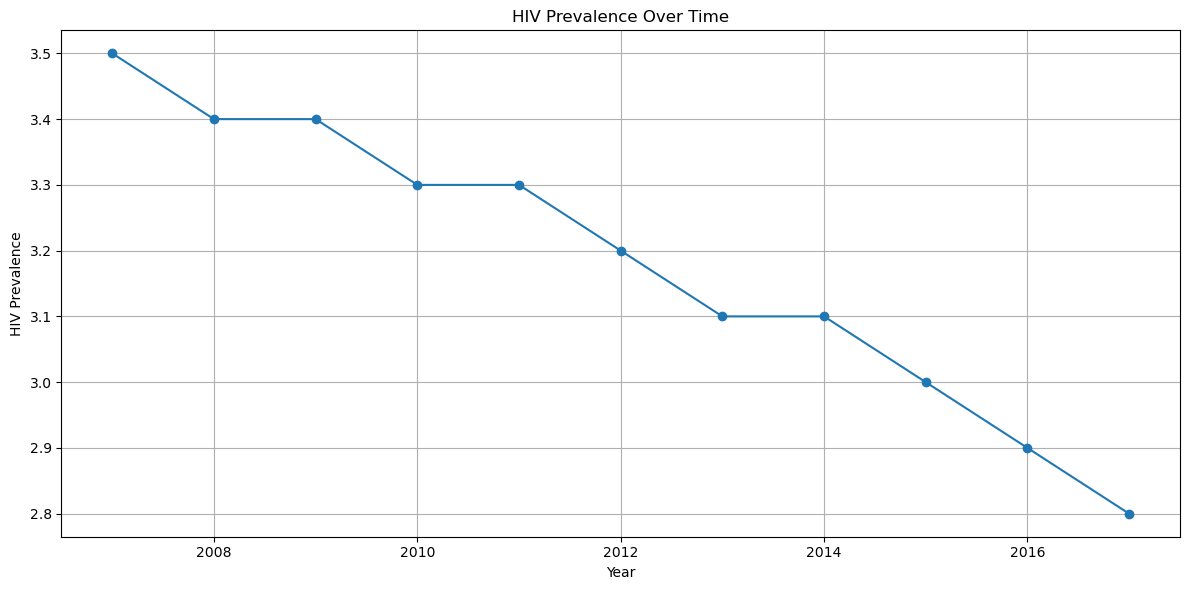

In [80]:
def plot_time_series(df, x_var, y_var, title='', xlabel='', ylabel=''):
    """
    Generates a time series plot for the specified x and y variables.
    
    Parameters:
    - df: DataFrame containing the data.
    - x_var: Column name for the x-axis (time).
    - y_var: Column name for the y-axis (value to plot over time).
    - title: The title of the plot.
    - xlabel: The label for the x-axis.
    - ylabel: The label for the y-axis.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df[x_var], df[y_var], marker='o')
    plt.title(title if title else f'Time Series Plot of {y_var} over {x_var}')
    plt.xlabel(xlabel if xlabel else x_var)
    plt.ylabel(ylabel if ylabel else y_var)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Usage
# Assuming df_final is your DataFrame and is already loaded
plot_time_series(df_final, 'Year', 'HIV_prev', title='HIV Prevalence Over Time', xlabel='Year', ylabel='HIV Prevalence')

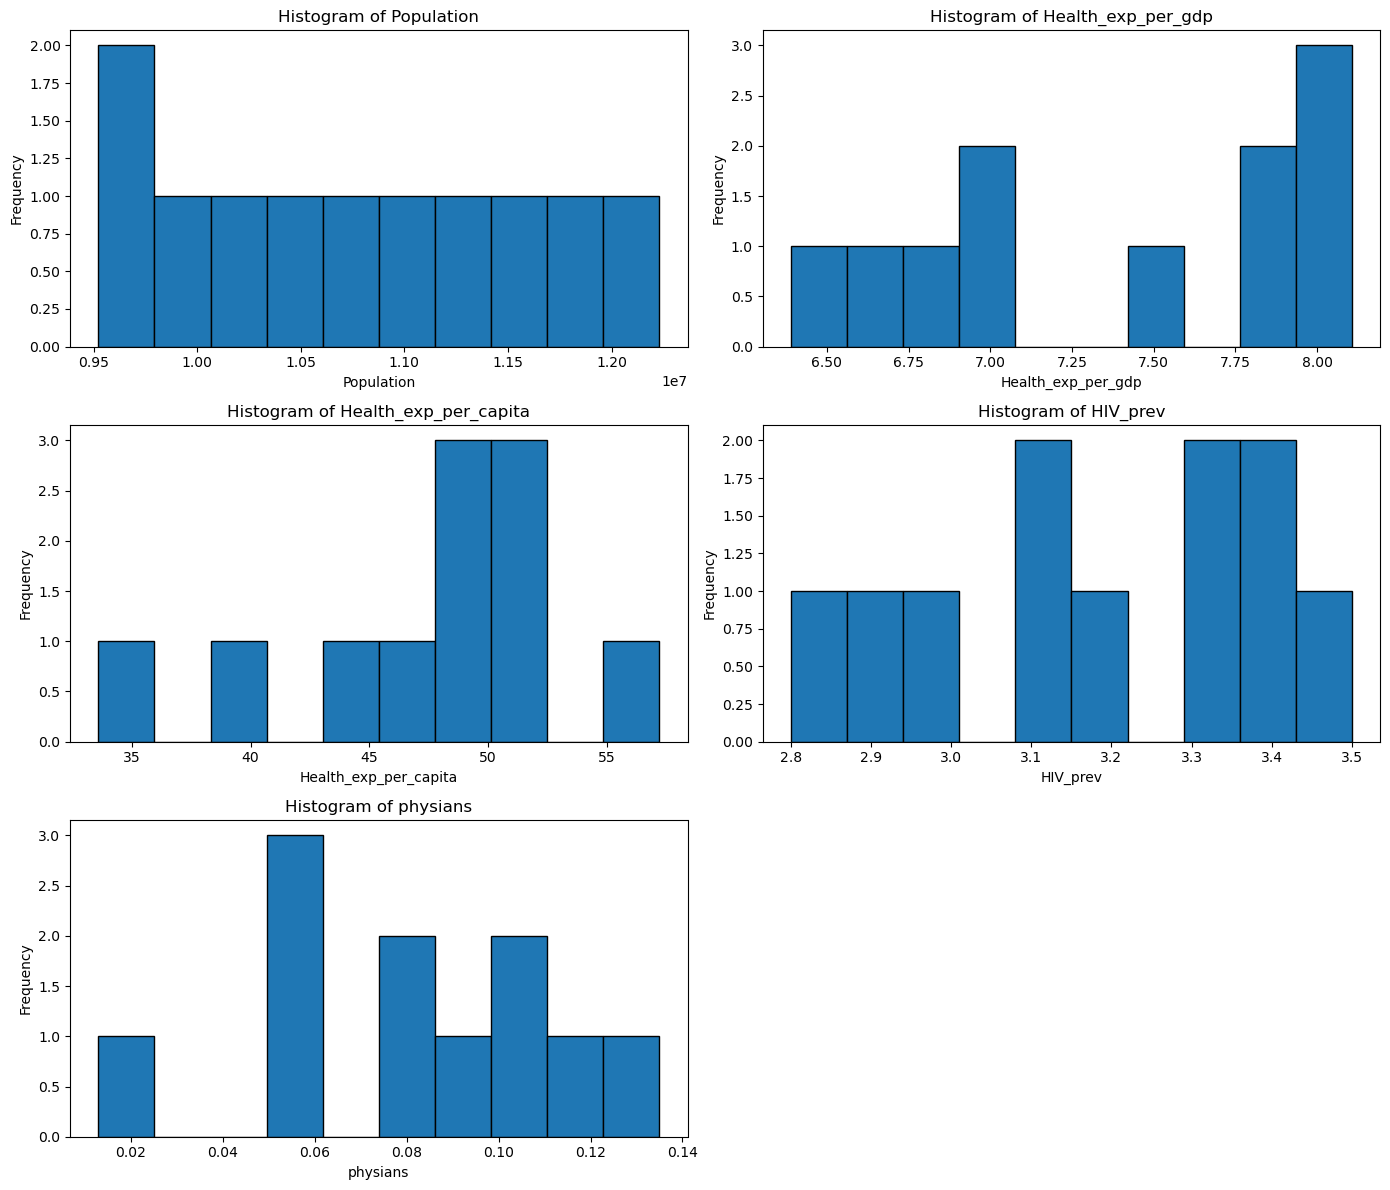

In [81]:
def plot_histograms(df, features, bins=10):
    """
    Generates histograms for the specified features.
    
    Parameters:
    - df: DataFrame containing the data.
    - features: List of column names to plot histograms for.
    - bins: Number of bins for the histogram.
    """
    n_rows = (len(features) + 1) // 2
    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(14, n_rows * 4))
    axes = axes.flatten()  # Flatten to 1D array for easy indexing
    
    for i, feature in enumerate(features):
        axes[i].hist(df[feature].dropna(), bins=bins, edgecolor='black')
        axes[i].set_title(f'Histogram of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
    
    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Usage
# Assuming df_final is your DataFrame and is already loaded
features_to_plot = ['Population', 'Health_exp_per_gdp', 'Health_exp_per_capita', 'HIV_prev', 'physians']
plot_histograms(df_final, features_to_plot)

# Modeling

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Feature scaling
scaler = StandardScaler()
features = ['Population', 'Health_exp_per_gdp', 'Health_exp_per_capita', 'physians']
df_final[features] = scaler.fit_transform(df_final[features])

In [84]:
# Train-test split
X = df_final[features]
y = df_final['HIV_prev']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 0.09949588886961948


In [85]:
future_data = {
    'Year': [2018],
    'Population': [12531808],  # Projected population for 2018 and 2019
    'Health_exp_per_gdp': [6.69975424],         # Projected health expenditure as % of GDP
    'Health_exp_per_capita': [51.54394531],        # Projected health expenditure per capita
    'physians': [0.132]                  # Projected number of physicians
}

# Convert the dictionary to a DataFrame
future_df = pd.DataFrame(future_data)

# Scale the features using the same scaler previously fitted
future_df[features] = scaler.transform(future_df[features])

# Predict HIV prevalence using the trained model
future_df['HIV_prev_predicted'] = model.predict(future_df[features])

# Display the predictions
print(future_df[['Year', 'HIV_prev_predicted']])

   Year  HIV_prev_predicted
0  2018            2.905123


In [86]:
import pickle
import joblib
import warnings
warnings.filterwarnings("ignore")

In [87]:
# Saving the scaler object for later use during model deployment
with open('standard_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [88]:
# Save the model
with open('Linear_regression.pkl', 'wb') as file:
    pickle.dump(model, file)